Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.<br>
In simple terms,Linear Regression is like drawing a straight line through a bunch of points on a graph. It helps us understand how one thing depends on another. Let's use an example:<br>
Imagine you're running a fruit stand, and you want to understand how the price you set for apples in kilograms (in dollars per kilogram) affects how many kilograms of apples you sell each day.<br>
<br>
You collect data for a week, recording both the price per kilogram and the total kilograms of apples sold each day.<br>
<br>
Now, let's use linear regression and these evaluation metrics with this apple sales example:
<br>

## Linear Regression:

You'd find the equation of the line that best fits these points: **Apples Sold = mx + b**, <br>
where x is the apple price, <br>m is the slope, and <br> 
b is the y-intercept.<br>
![Alt text](image-6.png)<br>
Linear regression helps you understand how changes in the price of apples relate to changes in the amount of apples sold.
## Residuals:
![Alt text](image-7.png)

You'd examine residuals to check if your model accurately captures the patterns in your data.<br>
Positive residuals indicate underpredictions, while negative residuals indicate overpredictions.<br>
## Mean Absolute Error (MAE):
![Alt text](image-8.png)<br>
You'd calculate MAE to find out, on average, how far off your predictions are from the actual sales data.<br>
For each day, you'd find the absolute difference between the actual and predicted apples sold, and then take the average of these differences.
## Mean Squared Error (MSE):
![Alt text](image-3.png)<br>
MSE would help you assess the average squared difference between predicted and actual sales.<br>
It gives more weight to days with larger errors.
## Root Mean Squared Error (RMSE):
![Alt text](image-4.png)<br>
RMSE is the square root of MSE and provides a measure of the typical size of errors.<br>
It's in the same units as your sales data, making it more interpretable.
## R-Squared (R^2):
![Alt text](image-5.png)<br>
R^2 would tell you how well your model explains the variance in apple sales based on the price.<br>
A higher R^2 indicates that your model is better at explaining the relationship.<br>

<br>
By applying linear regression and these evaluation metrics to your apple sales data, you can better understand the relationship between apple price and sales, assess the accuracy of your predictions, and make informed decisions about pricing strategies.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read the dataset

In [3]:
icecream_data = pd.read_excel('icecream_sales.xlsx')
icecream_data.head()

,Temp,Sales
0,5,167
1,31,405
2,31,439
3,10,230
4,19,282


## Overview of the dataset

In [5]:
icecream_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp,200.0,17.725,10.330196,0.0,8.75,18.0,26.00,35.0
Sales,200.0,277.085,104.898361,84.0,184.75,285.0,362.75,486.0


## Checking missing values

In [40]:
icecream_data.isnull().sum()

Temp     0
Sales    0
dtype: int64

* There are no missing values

Text(0.5, 1.0, 'Distribution of Sales')

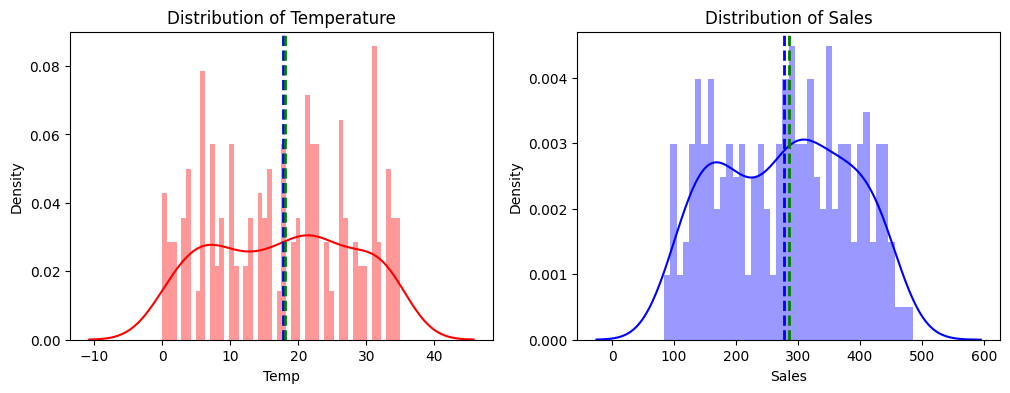

In [10]:
# Calculate mean and median of Temperature
mean_temp = icecream_data['Temp'].mean()
median_temp = icecream_data['Temp'].median()

# Calculate mean and median of Sales
mean_Sales = icecream_data['Sales'].mean()
median_Sales = icecream_data['Sales'].median()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(icecream_data['Temp'],bins=50,color='r',ax=ax)
# Add mean and median lines
ax.axvline(mean_temp, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_temp:.2f}')
ax.axvline(median_temp, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_temp:.2f}')
ax.set_title('Distribution of Temperature')

ax=f.add_subplot(122)
sns.distplot(icecream_data['Sales'],bins=40,color='b',ax=ax)
# Add mean and median lines
ax.axvline(mean_Sales, color='b', linestyle='dashed', linewidth=2, label=f'Mean: {mean_Sales:.2f}')
ax.axvline(median_Sales, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_Sales:.2f}')
ax.set_title('Distribution of Sales')

* As both the columns are of type numeric, we can plot the histograms and check the distributions. The mean and median data are almost same in both the columns.

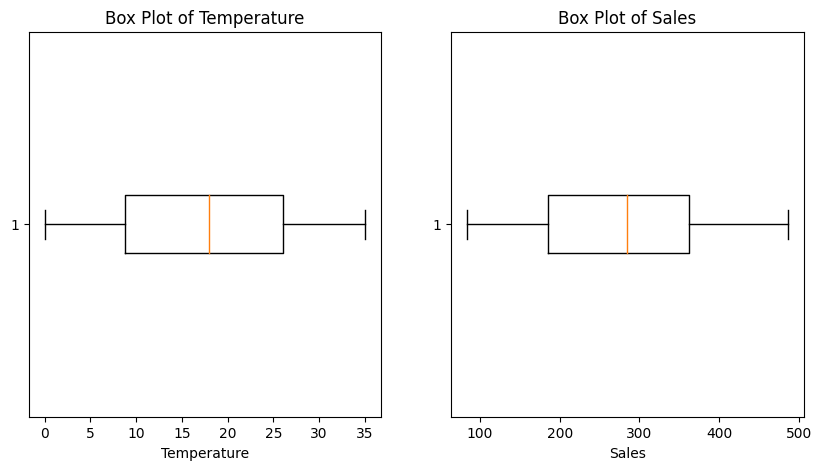

In [49]:
temperature_data = icecream_data['Temp']
sales_data = icecream_data['Sales']

# Create a box plot
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.boxplot(temperature_data, vert=False)  # vert=False for horizontal box plot
plt.xlabel('Temperature')
plt.title('Box Plot of Temperature')

plt.subplot(1,2,2)
plt.boxplot(sales_data, vert=False)  # vert=False for horizontal box plot
plt.xlabel('Sales')
plt.title('Box Plot of Sales')

plt.show()

* There are no outliers in the given data set

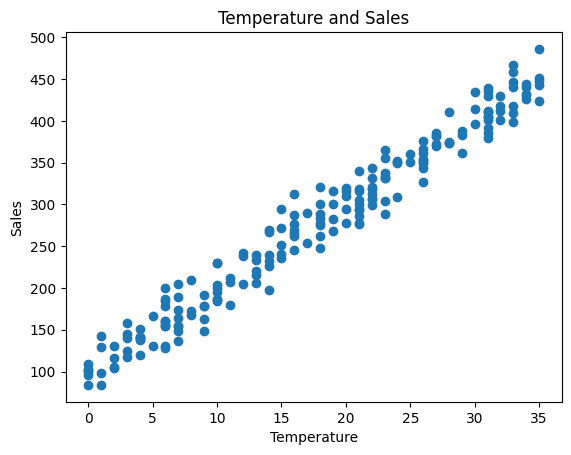

In [7]:
plt.scatter(x=icecream_data['Temp'],y=icecream_data['Sales'])
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.title('Temperature and Sales')
plt.show()

* There is a positive correlation between Temperature and Sales data

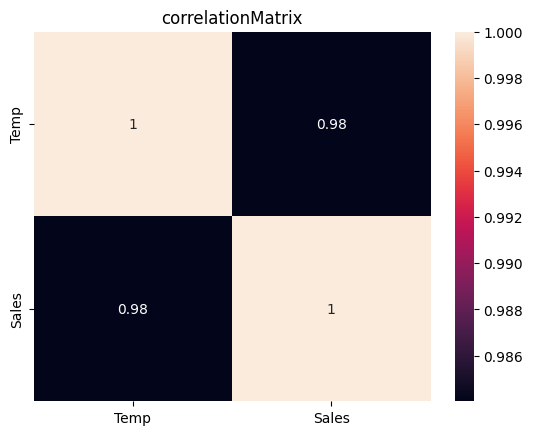

In [12]:
correlationMatrix = icecream_data.corr()
sns.heatmap(data=correlationMatrix, annot=True, color='black')
plt.title("correlationMatrix")
plt.show()

* The given data is highly correlated.

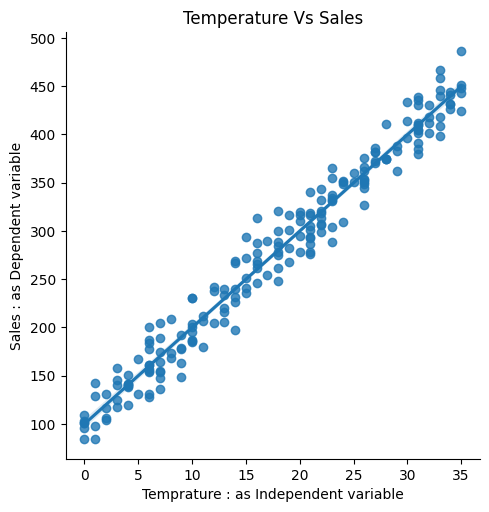

In [50]:
""" for our visualization purpose will fit line using seaborn library only for Temperature as independent variable 
and Sales as dependent variable"""

sns.lmplot(x='Temp',y='Sales',data=icecream_data)
plt.xlabel('Temprature : as Independent variable')
plt.ylabel('Sales : as Dependent variable')
plt.title('Temperature Vs Sales')
plt.show()

In [23]:
def perform_olsr(X, Y):
    # Calculate the number of data points
    n = len(X)

    # Calculate the mean of X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    # Calculate the cross-deviation and deviation of X
    cross_deviation = np.sum((X - mean_x) * (Y - mean_y))
    x_deviation = np.sum((X - mean_x) ** 2)

    # Calculate the coefficients (slope and intercept)
    slope = cross_deviation / x_deviation
    intercept = mean_y - (slope * mean_x)

    # Calculate the predicted values
    Y_pred = [(slope * x) + intercept for x in X]

    # Calculate evaluation metrics
    errors = [y - y_pred for y, y_pred in zip(Y, Y_pred)]
    mae = np.mean(np.abs(errors))
    mse = np.mean(np.square(errors))
    rmse = np.sqrt(mse)

    # Calculate R-squared
    ss_total = np.sum((Y - mean_y) ** 2)
    ss_residual = np.sum(np.square(errors))
    r_squared = 1 - (ss_residual / ss_total)

    return Y_pred,slope, intercept, mae, mse, rmse, r_squared, errors


In [24]:
# X = independent variable (features)
# Y = target variable (labels)
# Replace these with your actual data.
X = icecream_data['Temp'].values
Y = icecream_data['Sales'].values

y_hat, slope, intercept, mae, mse, rmse, r_squared, residuals = perform_olsr(X, Y)

print("Slope:", slope)
print("Intercept:", intercept)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared (R^2):", r_squared)

Slope: 9.992367868053472
Intercept: 99.97027953875218
Mean Absolute Error (MAE): 14.723817019548287
Mean Squared Error (MSE): 346.91159011107374
Root Mean Squared Error (RMSE): 18.6255628132702
R-Squared (R^2): 0.9683146633958573


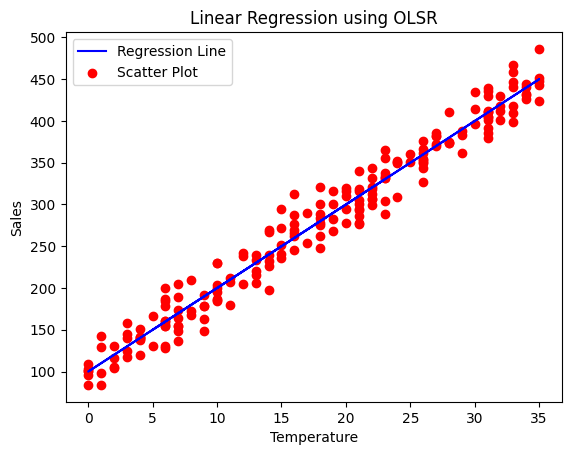

In [27]:
plt.plot(X,y_hat,c='blue',label='Regression Line')
plt.scatter(X,Y, c='red',label='Scatter Plot')
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("Linear Regression using OLSR")
plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = icecream_data['Temp'].values
X = X.reshape(-1, 1)
Y = icecream_data['Sales'].values

# Split the data into training and testing sets (optional)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions using the test data
Y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(Y_test, Y_pred)

# Print the coefficients and evaluation metrics
print("Coefficients:", model.coef_[0])
print("Intercept:", model.intercept_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-Squared (R^2):", r_squared)

Coefficients: 10.005730840613825
Intercept: 99.60542302295053
Mean Absolute Error (MAE): 15.33342311348513
Mean Squared Error (MSE): 371.41899616602876
Root Mean Squared Error (RMSE): 19.272233813599
R-Squared (R^2): 0.9633796745240695


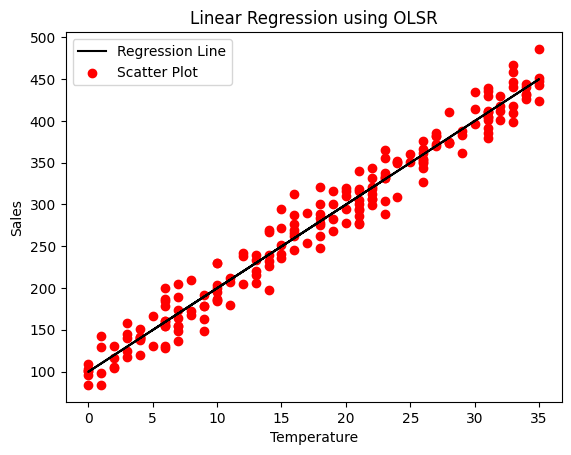

In [33]:
Y_pred = model.predict(X)
plt.plot(X,Y_pred,c='black',label='Regression Line')
plt.scatter(X,Y, c='red',label='Scatter Plot')
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("Linear Regression using OLSR")
plt.legend()
plt.show()